

<h1> <center>Análise de Dados dos trabalhadores com deficiência - Cadastro Geral de Empregados e Desempregados - BRASIL/2019 </center></h1>


Fonte: site basedosdados.org

Apesar de existirem campanhas para inclusão dos trabalhadores com deficiência no mercado de trabalho, e legislação específica,que garante um percentual de vagas nas empresas.Os trabalhadores reabilitados foram renomeados para "Nao deficiente". Encontramos na base de dados do CAGED, 205.101 registros de trabalhadores com deficiência em 2019, no Brasil. Analisamos os dados de 205.101 trabalhadores com deficiência

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 5.0 MB/s 


In [3]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Lendo os dados tratados do dataframe que contém dados com os trabalhadores cadastrados no Brasil em 2019)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto_AnaliseCaged/BaseCaged2019.csv')
df.head()

,Unnamed: 0,mes,sigla_uf,admitidos_desligados,salario_mensal,indicador_portador_deficiencia,tipo_deficiencia,grau_instrucao,idade,sexo,raca_cor
0,0,Janeiro,AC,Admissao,1077,sem deficiencia,Nao deficiente,Medio completo,20,Feminino,Negra
1,1,Janeiro,AC,Admissao,1077,sem deficiencia,Nao deficiente,Medio completo,24,Feminino,Negra
2,2,Janeiro,AC,Admissao,1617,sem deficiencia,Nao deficiente,Medio completo,23,Feminino,Negra
3,3,Janeiro,AC,Admissao,1500,sem deficiencia,Nao deficiente,Superior completo,31,Feminino,Negra
4,6,Janeiro,AC,Admissao,1020,sem deficiencia,Nao deficiente,Medio completo,36,Feminino,Negra


In [8]:
#Selecionando os registros de trabalhadores com deficiencia
df = df.loc[df['tipo_deficiencia'] != 'Nao deficiente']
df

,Unnamed: 0,mes,sigla_uf,admitidos_desligados,salario_mensal,indicador_portador_deficiencia,tipo_deficiencia,grau_instrucao,idade,sexo,raca_cor
173,236,Janeiro,AP,Desligamento,2321,com deficiencia,Fisica,Medio completo,34,Feminino,Negra
264,340,Janeiro,AM,Admissao,754,com deficiencia,Fisica,Superior incompleto,23,Feminino,Negra
279,355,Janeiro,AM,Admissao,1398,com deficiencia,Fisica,Medio completo,24,Feminino,Negra
289,365,Janeiro,AM,Admissao,1458,com deficiencia,Fisica,Medio completo,37,Feminino,Negra
297,373,Janeiro,AM,Admissao,1673,com deficiencia,Visual,Medio completo,24,Feminino,Negra
...,...,...,...,...,...,...,...,...,...,...,...
25714477,18619219,Janeiro,SP,Admissao,1836,com deficiencia,Auditiva,Medio completo,36,Masculino,Negra
25714721,18619488,Janeiro,SP,Admissao,640,com deficiencia,Visual,Medio completo,27,Masculino,Branca
25716292,18621274,Janeiro,SP,Admissao,1440,com deficiencia,Fisica,Medio completo,36,Masculino,Negra
25716301,18621283,Janeiro,SP,Admissao,1461,com deficiencia,Visual,Medio completo,21,Masculino,Negra


In [9]:
#Gerando a base com os trabalhadores com deficiência
df.to_csv('/content/drive/MyDrive/Colab Notebooks/BaseCagedPCD.csv')

In [10]:
#Criando o dataframe contendo a quantidade de trabalhadores com deficiência cadastrados por estado em 2019
dfPCD_uf = pd.DataFrame(df['sigla_uf'].value_counts())
dfPCD_uf['Proporcao'] = round(dfPCD_uf * 100 / dfPCD_uf.sum(),1)
dfPCD_uf.reset_index()
dfPCD_uf.sort_index()

,sigla_uf,Proporcao
AC,232,0.1
AL,1326,0.6
AM,4200,2.0
AP,337,0.2
BA,7983,3.9
CE,6806,3.3
DF,7064,3.4
ES,4051,2.0
GO,5724,2.8
MA,2222,1.1


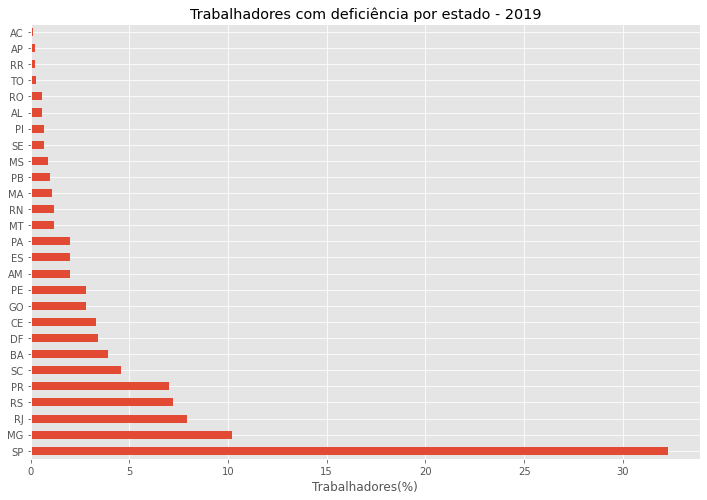

In [11]:
#Gerando o gráfico com a distribuição de trabalhadores com deficiência por estado
plt.figure(figsize=(12,8))
plt.style.use('ggplot')
dfPCD_uf['Proporcao'].plot(kind = 'barh')
plt.title("Trabalhadores com deficiência por estado - 2019")
plt.xlabel("Trabalhadores(%)")
plt.savefig('EstadosPCD.png')

Os trabalhadores do gênero masculino representam 62,2% dos trabalhadores com deficiência cadastrados no CAGED em 2019

In [12]:
dfPCDGen = pd.DataFrame(df['sexo'].value_counts())
dfPCDGen['proporcao'] = round(dfPCDGen * 100 /dfPCDGen.sum(),1)
dfPCDGen

,sexo,proporcao
Masculino,127495,62.2
Feminino,77606,37.8


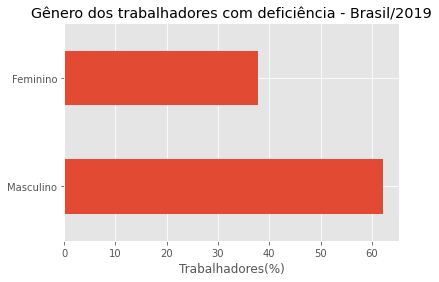

In [13]:
#Gerando o gráfico com a distribuição dos trabalhadores por gênero
dfPCDGen['proporcao'].plot(kind = 'barh')
plt.title('Gênero dos trabalhadores com deficiência - Brasil/2019')
plt.xlabel('Trabalhadores(%)')
plt.savefig('GeneroPCD.png')

In [14]:
dfRDf = pd.DataFrame(df['raca_cor'].value_counts())
dfRDf['Proporcao'] = round(dfRDf['raca_cor'] * 100/dfRDf['raca_cor'].sum(),1)
dfRDf.reset_index()
dfRDf = dfRDf.sort_values(by = 'Proporcao',ascending = False)
dfRDf

,raca_cor,Proporcao
Negra,105698,51.5
Branca,96633,47.1
Amarela,1440,0.7
Indigena,1330,0.6


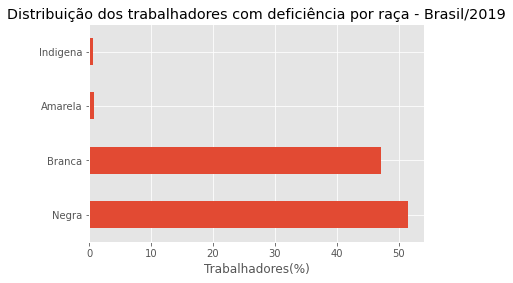

In [15]:
dfRDf['Proporcao'].plot(kind = 'barh')
plt.title('Distribuição dos trabalhadores com deficiência por raça - Brasil/2019')
plt.xlabel('Trabalhadores(%)')
plt.savefig('RacaPCD.png')

In [16]:
#Tabela dinâmica com a distribuição dos trabalhadores por raça, tipo de deficiência e faixa salarial
tablePCDRGen = pd.pivot_table(df, values= ['idade'], index=['raca_cor'],
                    columns=['sexo'], aggfunc= 'count')
tablePCDRGen

idade          
sexo     Feminino Masculino
raca_cor                   
Amarela       613       827
Branca      39172     57461
Indigena      517       813
Negra       37304     68394

<Figure size 1080x720 with 0 Axes>

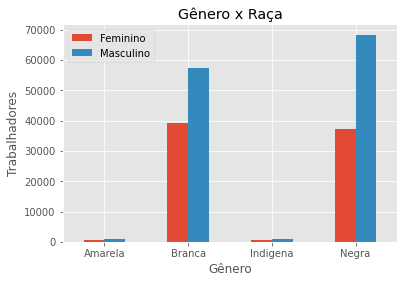

In [17]:
plt.figure(figsize = (15,10))
tablePCDRGen.plot(kind = 'bar')
plt.xticks(rotation = 360)
plt.title('Gênero x Raça')
plt.xlabel('Gênero')
plt.ylabel('Trabalhadores')
plt.legend(['Feminino','Masculino'])
plt.savefig('GeneroRacaPCD.png')

In [18]:
#Distribuição dos trabalhadores com deficiência por escolaridade
dfPCDEsc = pd.DataFrame(df['grau_instrucao'].value_counts())
dfPCDEsc.index = ['Analfabeto','Fundamental incompleto','Fundamental completo','Medio incompleto','Medio completo','Superior incompleto','Superior completo']
dfPCDEsc['grau_instrucao'] = [1378,24143,16308,17464,113152,10332,22324]
dfPCDEsc['Proporcao'] = round(dfPCDEsc * 100 / dfPCDEsc.sum(),1)
dfPCDEsc

,grau_instrucao,Proporcao
Analfabeto,1378,0.7
Fundamental incompleto,24143,11.8
Fundamental completo,16308,8.0
Medio incompleto,17464,8.5
Medio completo,113152,55.2
Superior incompleto,10332,5.0
Superior completo,22324,10.9


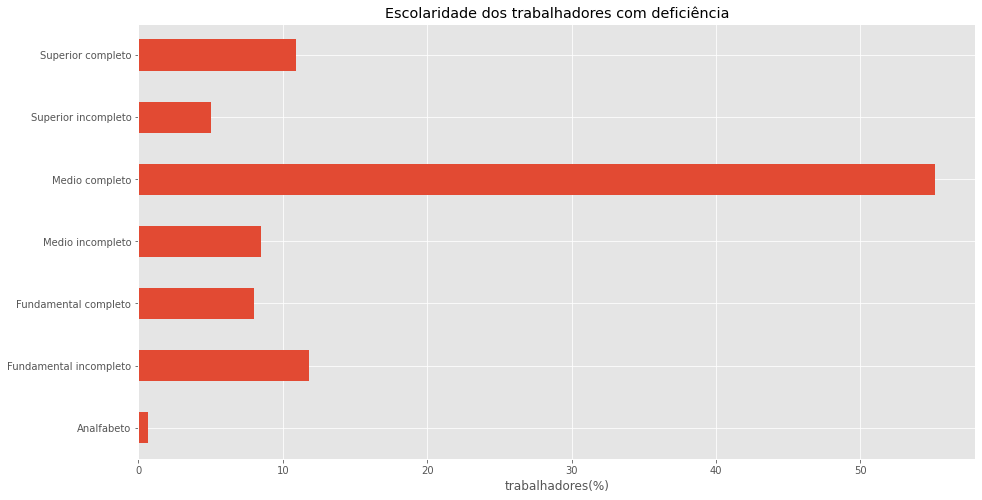

In [19]:
#Gerando o gráfico com a distribuição dos trabalhadores com deficiência por escolaridade
plt.figure(figsize = (15,8))
dfPCDEsc['Proporcao'].plot(kind = 'barh')
plt.xlabel('trabalhadores(%)')
plt.title('Escolaridade dos trabalhadores com deficiência')
plt.savefig('EscolaridadePCD.png')


In [22]:
df_TpDef = pd.DataFrame(df['tipo_deficiencia'].value_counts())
df_TpDef['Proporcao'] = round(df_TpDef* 100/df_TpDef.sum(),1)
print('------Distribuição dos trabalhadores com deficiência -Brasil/2019--------')
df_TpDef.reset_index()
df_TpDef = df_TpDef.sort_index()
df_TpDef

------Distribuição dos trabalhadores com deficiência -Brasil/2019--------


,tipo_deficiencia,Proporcao
Auditiva,38932,19.0
Fisica,101961,49.7
Intelectual(Mental),21744,10.6
Multipla,3081,1.5
Visual,39383,19.2


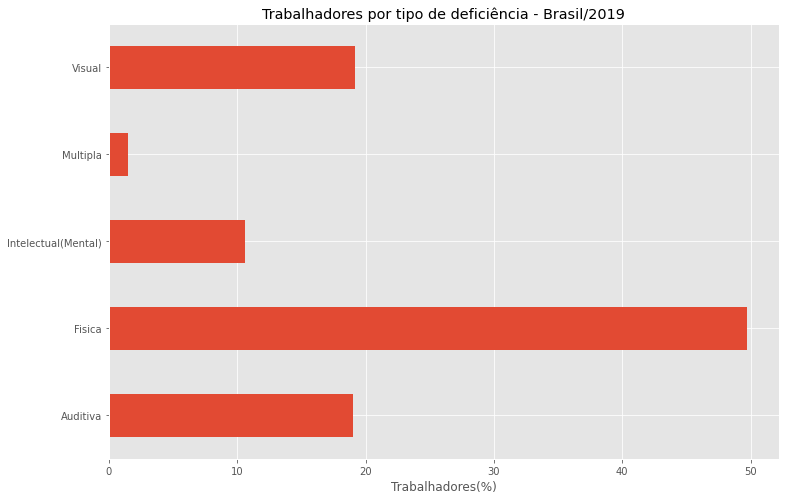

In [23]:
#Gerando o gráfico de barras dos trabalhadores por tipo de deficiência
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
df_TpDef['Proporcao'].plot(kind = 'barh')
plt.title("Trabalhadores por tipo de deficiência - Brasil/2019")
plt.xlabel("Trabalhadores(%)")
plt.savefig('TipoDeficiencias.png')

In [24]:
#Distribuindo os trabalhadores com deficiência por faixa etária
bin_labels =labels=['14 a 19 anos', '20 a 24 anos', '25 a 29 anos','30 a 34 anos','35 a 39 anos','40 a 44 anos','45 a 49 anos','50 a 54 anos','55 a 59 anos','60 a 65 anos']
df['faixa_etaria'] = pd.cut(x=df['idade'], bins=[14,20,25,30,35,40,45,50,55,60,65],labels=bin_labels)
print('------Distribuição dos trabalhadores com deficiência por faixa etária - Brasil/2019-------')
dfPCDFaixas = pd.DataFrame(df['faixa_etaria'].value_counts())
dfPCDFaixas.sort_index(ascending= True,inplace=True)
dfPCDFaixas['proporcao'] = round(dfPCDFaixas * 100 / dfPCDFaixas.sum(),1)
dfPCDFaixas

------Distribuição dos trabalhadores com deficiência por faixa etária - Brasil/2019-------


,faixa_etaria,proporcao
14 a 19 anos,16111,7.9
20 a 24 anos,32854,16.0
25 a 29 anos,34585,16.9
30 a 34 anos,34597,16.9
35 a 39 anos,30541,14.9
40 a 44 anos,22814,11.1
45 a 49 anos,15428,7.5
50 a 54 anos,9882,4.8
55 a 59 anos,5725,2.8
60 a 65 anos,2521,1.2


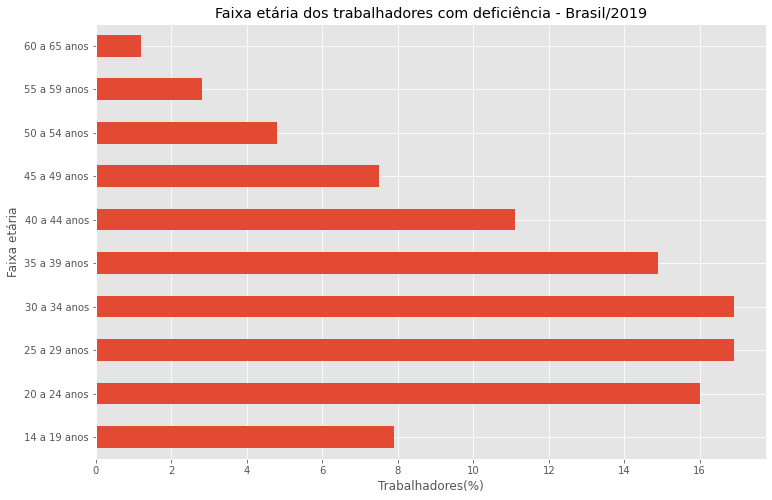

In [25]:
#Gerando o gráfico com as faixas etárias dos trabalhadores com deficiência
plt.figure(figsize = (12,8))
dfPCDFaixas['proporcao'].plot(kind ='barh')
matplotlib.pyplot.title('Faixa etária dos trabalhadores com deficiência - Brasil/2019')
matplotlib.pyplot.xlabel('Trabalhadores(%)')
matplotlib.pyplot.ylabel('Faixa etária')
plt.savefig('FaixaEtariaPCD.png')

In [26]:
#Criando o dataframe contendo a quantidade de trabalhadores cadastrados por mês
dfPCDMes = pd.DataFrame(df['mes'].value_counts(),index = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio','Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro','Novembro', 'Dezembro'])
dfPCDMes['proporcao'] = round(dfPCDMes * 100 / dfPCDMes .sum(),1)
dfPCDMes

,mes,proporcao
Janeiro,14942,7.3
Fevereiro,16480,8.0
Março,15878,7.7
Abril,17221,8.4
Maio,17633,8.6
Junho,16819,8.2
Julho,18183,8.9
Agosto,19535,9.5
Setembro,18464,9.0
Outubro,18926,9.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


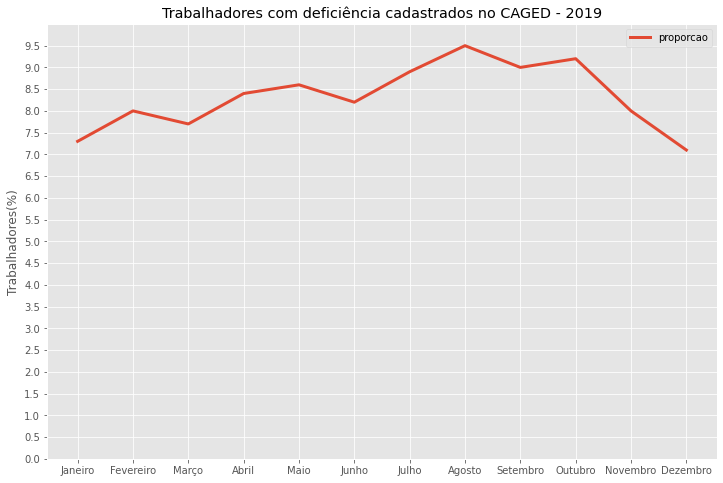

In [27]:
#Gerando o gráfico com os trabalhadores com deficiência cadastrados por mês em 2019
plt.figure(figsize= (12,8))
dfPCDMes['proporcao'].plot(linewidth = 3)
plt.ylabel('Trabalhadores(%)')
ax =  plt.axes()
ax.set_ylim([0,10.0])
ax.set_yticks([0,0.5,1,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5])
plt.xticks(ticks = np.arange(0,12),labels = ('Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio','Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro','Novembro', 'Dezembro' ))
plt.title('Trabalhadores com deficiência cadastrados no CAGED - 2019')
plt.legend()
plt.savefig('TrabalhadoresPCDMes.png')
plt.show()

Entre os trabalhadores com deficiência ocorreram 104.028 desligamentos e 101.073 admissões


In [28]:
df['admitidos_desligados'].value_counts()

Desligamento    104028
Admissao        101073
Name: admitidos_desligados, dtype: int64

In [30]:
dfPCDAdm = df.loc[df['admitidos_desligados'] == 'Admissao']
dfPCDAdm = pd.DataFrame(dfPCDAdm['mes'].value_counts(),index = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio','Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro','Novembro', 'Dezembro'])
dfPCDAdm['ProporcaoAdmitidos'] = round(dfPCDAdm['mes'] * 100 / dfPCDAdm['mes'].sum(),1)
dfPCDAdm

,mes,ProporcaoAdmitidos
Janeiro,6819,6.7
Fevereiro,8271,8.2
Março,7803,7.7
Abril,8801,8.7
Maio,8588,8.5
Junho,8239,8.2
Julho,9163,9.1
Agosto,10070,10.0
Setembro,9379,9.3
Outubro,9554,9.5


In [29]:
dfPCDdesl = df.loc[df['admitidos_desligados'] == 'Desligamento']
dfPCDdesl = pd.DataFrame(dfPCDdesl['mes'].value_counts(),index = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio','Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro','Novembro', 'Dezembro'])
dfPCDdesl['ProporcaoDesligados'] = round(dfPCDdesl['mes'] * 100 / dfPCDdesl['mes'].sum(),1)
dfPCDdesl

,mes,ProporcaoDesligados
Janeiro,8123,7.8
Fevereiro,8209,7.9
Março,8075,7.8
Abril,8420,8.1
Maio,9045,8.7
Junho,8580,8.2
Julho,9020,8.7
Agosto,9465,9.1
Setembro,9085,8.7
Outubro,9372,9.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


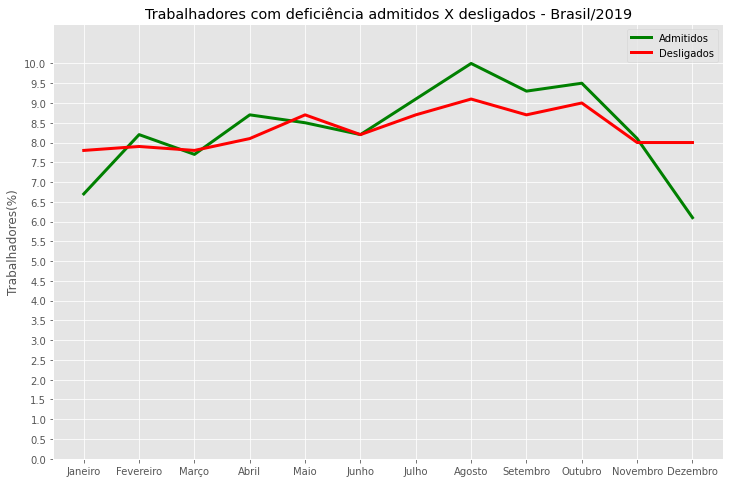

In [41]:
#Gerando o gráfico dos trabalhadores com deficiência que foram admitidos ou desligados
y_PCDadm = dfPCDAdm['ProporcaoAdmitidos']
y_PCDdesl = dfPCDdesl['ProporcaoDesligados']
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
#plt.plot(y_PCDadm,y_PCDdesl)
plt.xticks(ticks = np.arange(0,12),labels = ('Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio','Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro','Novembro', 'Dezembro' ))
ax =  plt.axes()
ax.set_ylim([0,11.0])
ax.set_yticks([0,0.5,1,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0])
plt.plot(y_PCDadm, label = 'Admitidos', color = 'green',linewidth = 3)
plt.plot(y_PCDdesl, label = 'Desligados', color = 'red',linewidth = 3)
plt.title('Trabalhadores com deficiência admitidos X desligados - Brasil/2019')
plt.ylabel("Trabalhadores(%)")
plt.legend()
plt.savefig('TrabalhadoresPCDADM_DESL.png')
plt.show()

In [43]:
#Agrupando os salários em faixas salariais
bin_labels =labels=['Até 1 salário mínimo', '1 a 2 salários mínimos', '2 a 3 salários mínimos','3 a 4 salários mínimos','4 a 5 salários mínimos','Acima de 5 salários mínimos']
df['faixa_salarial'] = pd.cut(x=df['salario_mensal'],bins=[0,997.99,1995.99,2993.99,3991.99,4989.99,4990.01],labels=bin_labels)

In [44]:
#Distribuindo os salários em faixas salariais
print('------Distribuição dos trabalhadores com deficiencia por faixa salarial- Brasil/2019-------')
print('Os salários informados com 0 foram excluídos')
dfPCDSalarios = pd.DataFrame(df['faixa_salarial'].value_counts())
dfPCDSalarios.sort_index(ascending= True, inplace=True)
dfPCDSalarios['Proporcao'] = round(dfPCDSalarios * 100 / dfPCDSalarios.sum(),1)
dfPCDSalarios

------Distribuição dos trabalhadores com deficiencia por faixa salarial- Brasil/2019-------
Os salários informados com 0 foram excluídos


,faixa_salarial,Proporcao
Até 1 salário mínimo,17023,8.5
1 a 2 salários mínimos,159598,79.4
2 a 3 salários mínimos,17597,8.8
3 a 4 salários mínimos,4573,2.3
4 a 5 salários mínimos,2115,1.1
Acima de 5 salários mínimos,2,0.0


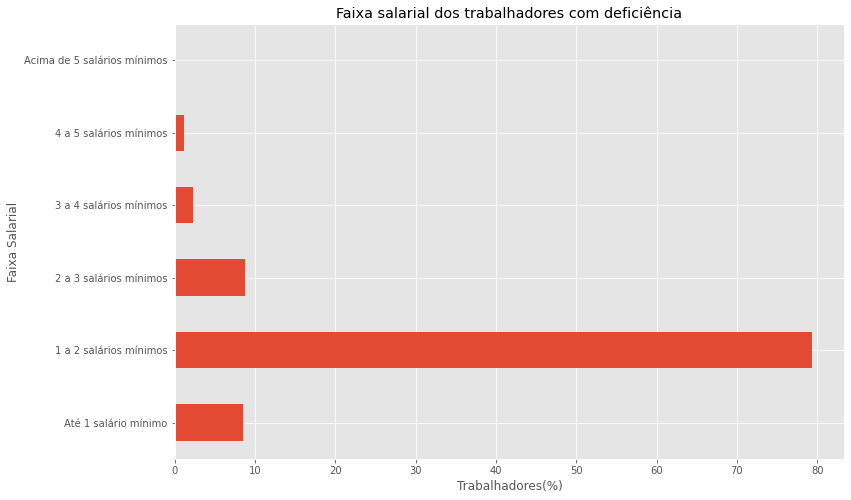

In [45]:
#Gerando o gráfico com as faixas salariais 
plt.figure(figsize = (12,8))
dfPCDSalarios['Proporcao'].plot(kind = 'barh')
matplotlib.pyplot.title('Faixa salarial dos trabalhadores com deficiência')
matplotlib.pyplot.xlabel('Trabalhadores(%)')
matplotlib.pyplot.ylabel('Faixa Salarial')
plt.savefig('FaixaSalarialPCD.png')

In [46]:
#Tabela dinâmica com a distribuição dos trabalhadores com deficiência por tipo, raca e gênero
tableUfRc = pd.pivot_table(df, values= ['idade'], index=['sexo','tipo_deficiencia'],
                    columns=['raca_cor'], aggfunc= 'count')
tableUfRc

idade                       
raca_cor                      Amarela Branca Indigena  Negra
sexo      tipo_deficiencia                                  
Feminino  Auditiva                148   9121       74   8118
          Fisica                  296  17829      386  17947
          Intelectual(Mental)      44   4108       12   3018
          Multipla                  6    624        2    499
          Visual                  119   7490       43   7722
Masculino Auditiva                142  10405       78  10846
          Fisica                  445  27892      660  36506
          Intelectual(Mental)      72   7700       11   6779
          Multipla                 13   1040        9    888
          Visual                  155  10424       55  13375

In [33]:
#Gerando a tabela do gênero masculino por tipo de deficiência e raça
df_Fem = df.loc[df['sexo'] == 'Feminino']
tableFem = pd.pivot_table(df_Fem, values= ['idade'], index=['tipo_deficiencia'],
                    columns=['raca_cor'], aggfunc= 'count')

In [31]:
#Gerando a tabela do gênero masculino por tipo de deficiência e raça
df_Masc = df.loc[df['sexo'] == 'Masculino']
tableMasc = pd.pivot_table(df_Masc, values= ['idade'], index=['tipo_deficiencia'],
                    columns=['raca_cor'], aggfunc= 'count')

<Figure size 720x576 with 0 Axes>

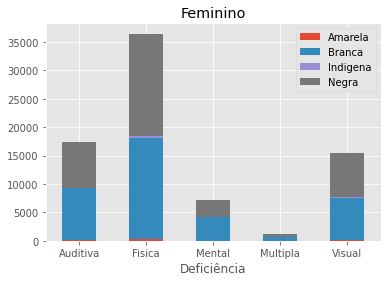

In [34]:
#Gráfico do gênero masculino por tipo de deficiência e raça
plt.figure(figsize = (10,8))
tableFem.plot.bar(stacked = True)
plt.xticks(ticks = np.arange(0,5),labels = ['Auditiva','Fisica','Mental','Multipla','Visual'],rotation = 360)
plt.xlabel('Deficiência')
plt.title('Feminino')
plt.legend(['Amarela','Branca','Indigena','Negra'])
plt.savefig('Feminino.png')

<Figure size 720x576 with 0 Axes>

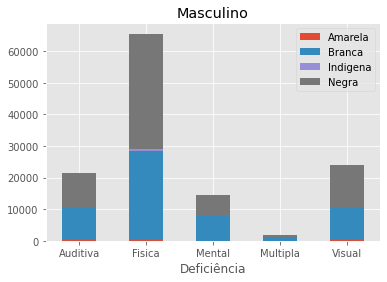

In [35]:
#Gráfico do gênero masculino por tipo de deficiência e raça
plt.figure(figsize = (10,8))
tableMasc.plot.bar(stacked = True)
plt.xticks(ticks = np.arange(0,5),labels = ['Auditiva','Fisica','Mental','Multipla','Visual'],rotation = 360)
plt.xlabel('Deficiência')
plt.title('Masculino')
plt.legend(['Amarela','Branca','Indigena','Negra'])
plt.savefig('Masculino')

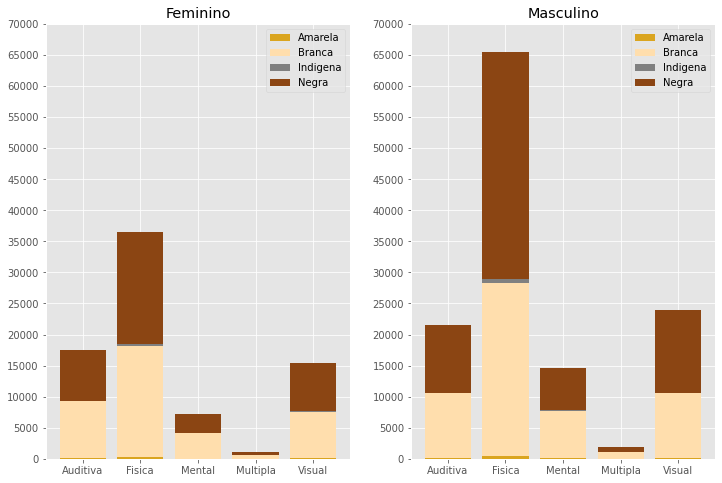

<Figure size 432x288 with 0 Axes>

In [36]:
#Gráficos para comparação entre os gêneros por tipo de deficiência e raça
x = ['Auditiva','Fisica','Mental','Multipla','Visual']
y1 = np.array([148,296,44,6,119])
y2 = np.array([9121,17829,4108,624,7490])
y3 = np.array([74,386,12,2,43])
y4 = np.array([8118,17947,3018,499,7722])

y_1 = np.array([142,445,72,13,155])
y_2 = np.array([10405,27892,7700,1040,10424])
y_3 = np.array([78,660,11,9,55])
y_4 = np.array([10846,36506,6779,888,13375])

plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.bar(x,y1,color='goldenrod')
plt.bar(x,y2,bottom = y1,color='navajowhite')
plt.bar(x,y3,bottom = y1+y2,color='gray')
plt.bar(x,y4,bottom = y1+y2+y3,color='saddlebrown')
plt.xticks(ticks = np.arange(0,5))
plt.yticks(ticks = np.arange(0,75000,5000))
plt.title('Feminino')
plt.legend(['Amarela','Branca','Indigena','Negra'])

plt.subplot(1,2,2)
plt.bar(x,y_1,color='goldenrod')
plt.bar(x,y_2,bottom = y_1,color='navajowhite')
plt.bar(x,y_3,bottom = y_1+y_2,color='gray')
plt.bar(x,y_4,bottom = y_1+y_2+y_3,color='saddlebrown')
plt.xticks(ticks = np.arange(0,5),labels = ['Auditiva','Fisica','Mental','Multipla','Visual'])
plt.yticks(ticks = np.arange(0,75000,5000))
plt.legend(['Amarela','Branca','Indigena','Negra'])
plt.title('Masculino')
plt.show()
plt.savefig('GenerosRaca.png')

In [47]:
#Tabela dinâmica com a distribuição dos trabalhadores por raça e faixa salarial
tableSalDef = pd.pivot_table(df, values= ['idade'], index=['raca_cor'],
                    columns=['faixa_salarial'], aggfunc= 'count')
tableSalDef


idade                         \
faixa_salarial Até 1 salário mínimo 1 a 2 salários mínimos   
raca_cor                                                     
Amarela                         147                   1028   
Branca                         8126                  70465   
Indigena                         66                   1133   
Negra                          8684                  86972   

                                                              \
faixa_salarial 2 a 3 salários mínimos 3 a 4 salários mínimos   
raca_cor                                                       
Amarela                           147                     53   
Branca                          10483                   2980   
Indigena                           84                     25   
Negra                            6883                   1515   

                                                                   
faixa_salarial 4 a 5 salários mínimos Acima de 5 salários mínimos  
raca_cor                                                           
Amarela                            17                           0  
Branca                           1455                           2  
Indigena                            9                           0  
Negra                             634                           0

<Figure size 1440x1080 with 0 Axes>

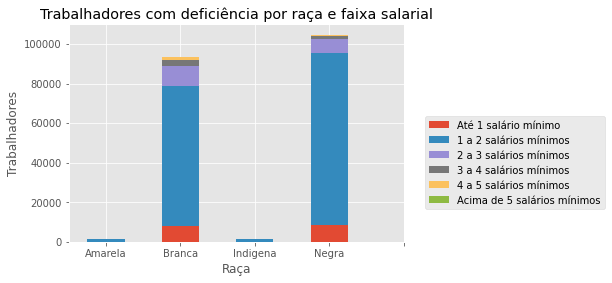

In [48]:
plt.figure(figsize = (20,15))
tableSalDef.plot.bar(stacked = True)
plt.xticks(ticks = np.arange(0,5),labels = ['Amarela','Branca','Indigena','Negra'],rotation = 360)
plt.xlabel('Raça')
plt.ylabel('Trabalhadores')
plt.title('Trabalhadores com deficiência por raça e faixa salarial')
plt.legend(['Até 1 salário mínimo','1 a 2 salários mínimos','2 a 3 salários mínimos','3 a 4 salários mínimos','4 a 5 salários mínimos','Acima de 5 salários mínimos'],bbox_to_anchor = (1.05, 0.6))
plt.savefig('RacaFxsalarial.png')

In [68]:
#Tabela dinâmica com a distribuição dos trabalhadores por raça e faixa salarial
tableSalEsc = pd.pivot_table(df, values= ['idade'], index=['sexo','faixa_salarial'],
                    columns=['grau_instrucao'], aggfunc= 'count')
tableSalEsc

idade                       \
grau_instrucao                        Analfabeto Fundamental completo   
sexo      faixa_salarial                                                
Feminino  Até 1 salário mínimo                65                  563   
          1 a 2 salários mínimos             254                 4055   
          2 a 3 salários mínimos               3                   95   
          3 a 4 salários mínimos               0                   15   
          4 a 5 salários mínimos               2                    8   
          Acima de 5 salários mínimos          0                    0   
Masculino Até 1 salário mínimo               125                  821   
          1 a 2 salários mínimos             902                 9662   
          2 a 3 salários mínimos              18                  720   
          3 a 4 salários mínimos               3                  158   
          4 a 5 salários mínimos               1                   78   
          Acima de 5 salários mínimos          0                    0   

                                                                             \
grau_instrucao                        Fundamental incompleto Medio completo   
sexo      faixa_salarial                                                      
Feminino  Até 1 salário mínimo                           852           4029   
          1 a 2 salários mínimos                        5594          37014   
          2 a 3 salários mínimos                          82           2551   
          3 a 4 salários mínimos                          15            307   
          4 a 5 salários mínimos                           8             79   
          Acima de 5 salários mínimos                      0              0   
Masculino Até 1 salário mínimo                          1432           4412   
          1 a 2 salários mínimos                       14917          56581   
          2 a 3 salários mínimos                         865           5757   
          3 a 4 salários mínimos                         191           1109   
          4 a 5 salários mínimos                          84            488   
          Acima de 5 salários mínimos                      0              0   

                                                                          \
grau_instrucao                        Medio incompleto Superior completo   
sexo      faixa_salarial                                                   
Feminino  Até 1 salário mínimo                    1227               521   
          1 a 2 salários mínimos                  4343              5653   
          2 a 3 salários mínimos                    99              2655   
          3 a 4 salários mínimos                    16              1126   
          4 a 5 salários mínimos                     5               532   
          Acima de 5 salários mínimos                0                 0   
Masculino Até 1 salário mínimo                    1843               431   
          1 a 2 salários mínimos                  9281              4336   
          2 a 3 salários mínimos                   467              2417   
          3 a 4 salários mínimos                    88              1090   
          4 a 5 salários mínimos                    35               674   
          Acima de 5 salários mínimos                0                 1   

                                                           
grau_instrucao                        Superior incompleto  
sexo      faixa_salarial                                   
Feminino  Até 1 salário mínimo                        359  
          1 a 2 salários mínimos                     3306  
          2 a 3 salários mínimos                      812  
          3 a 4 salários mínimos                      172  
          4 a 5 salários mínimos                       31  
          Acima de 5 salários mínimos                   0  
Masculino Até 1 salário mínimo                        343  
          1 a 2 salá

In [49]:
#Medidas de dispersão da variável salário mensal
df['salario_mensal'].describe().round(2)

count    205101.00
mean       1592.42
std        1723.93
min         300.00
25%        1090.00
50%        1287.00
75%        1595.00
max      133270.00
Name: salario_mensal, dtype: float64

In [50]:
#Cálculo do 1º quartil e 3º quartil
PCDq1 = df['salario_mensal'].quantile(0.25)
PCDq3 = df['salario_mensal'].quantile(0.75)

In [51]:
#Cálculo da Amplitude interquartil
PCDiqr = PCDq3 - PCDq1

In [52]:
#Cálculo dos limites inferior e superior
PCDli = PCDq1 - (1.5 * PCDiqr)
PCDls = PCDq3 + (1.5 * PCDiqr)
PCDli , PCDls

(332.5, 2352.5)

Após a definição dos limites inferior e superior, 

In [53]:
#Medidas de dispersão da variável salário mensal cálculo com os registros de salários entre os limites inferior(332,50) e superior(2.352,50)
PCDsalario_sem_outlier = pd.DataFrame(df[((df['salario_mensal'] >= PCDli) & (df['salario_mensal'] <= PCDls))])
PCDsalario_sem_outlier['salario_mensal'].describe().round(2)

count    185359.00
mean       1289.52
std         350.76
min         333.00
25%        1071.00
50%        1243.00
75%        1470.00
max        2352.00
Name: salario_mensal, dtype: float64

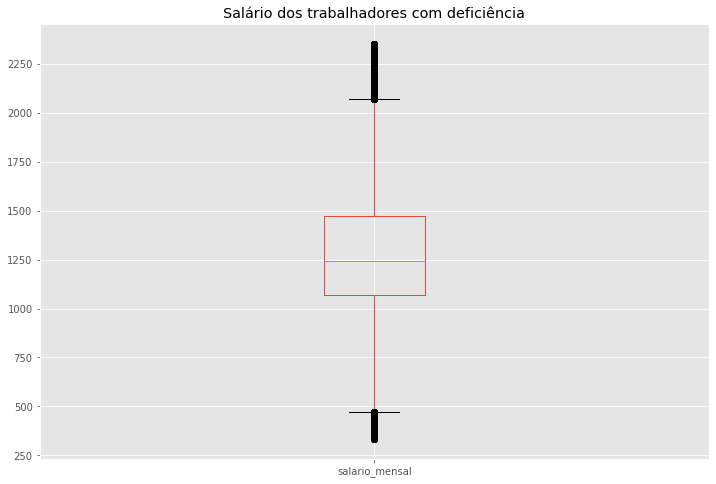

In [54]:
#Gerando o boxplot com os salários mensais dos Trabalhadores com deficiência, considerando os limites inferior e superior
plt.figure(figsize = (12,8))
PCDsalario_sem_outlier.boxplot( column = 'salario_mensal')
plt.title('Salário dos trabalhadores com deficiência')
plt.savefig('BoxplotSalarioPCD.png')

In [55]:
#Medidas de dispersão do salário agrupado pela raça
df.groupby(by = 'raca_cor')['salario_mensal'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
raca_cor,,,,,,,,
Amarela,1440.0,1811.74,2919.01,431.0,1057.5,1263.5,1647.00,62997.0
Branca,96633.0,1797.00,2164.00,300.0,1167.0,1383.0,1751.00,133270.0
Indigena,1330.0,1394.96,774.27,315.0,1035.0,1222.0,1435.75,9222.0
Negra,105698.0,1404.88,1134.69,301.0,1050.0,1198.0,1463.00,102954.0


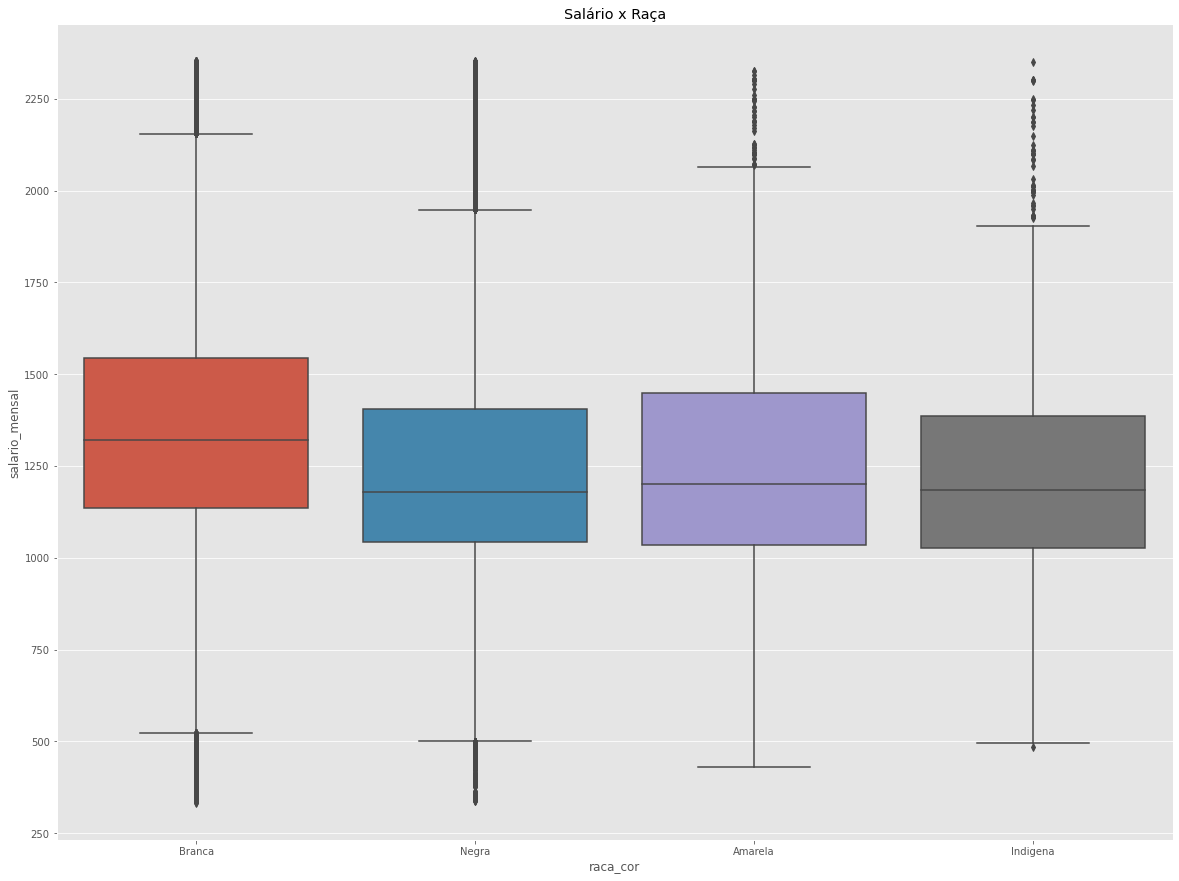

In [56]:
#Boxplot dos salários por raça
plt.figure(figsize = (20,15))
sns.boxplot(x = PCDsalario_sem_outlier['raca_cor'],
            y = PCDsalario_sem_outlier['salario_mensal'],
            order = ['Branca','Negra','Amarela','Indigena'])
plt.title('Salário x Raça')
plt.savefig('BoxplotPCDRacaSal_Salario.png')

In [57]:
#Medidas de dispersão do salário agrupado pelo tipo de deficiência
df.groupby(by = 'tipo_deficiencia')['salario_mensal'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
tipo_deficiencia,,,,,,,,
Auditiva,38932.0,1565.71,1645.08,300.0,1100.0,1287.0,1566.0,114466.0
Fisica,101961.0,1675.05,1858.30,300.0,1098.0,1310.0,1657.0,133270.0
Intelectual(Mental),21744.0,1216.97,1006.96,306.0,998.0,1165.0,1392.0,101200.0
Multipla,3081.0,1528.36,1333.29,301.0,1082.0,1276.0,1541.0,27973.0
Visual,39383.0,1617.17,1750.99,309.0,1108.0,1302.0,1616.0,111551.0


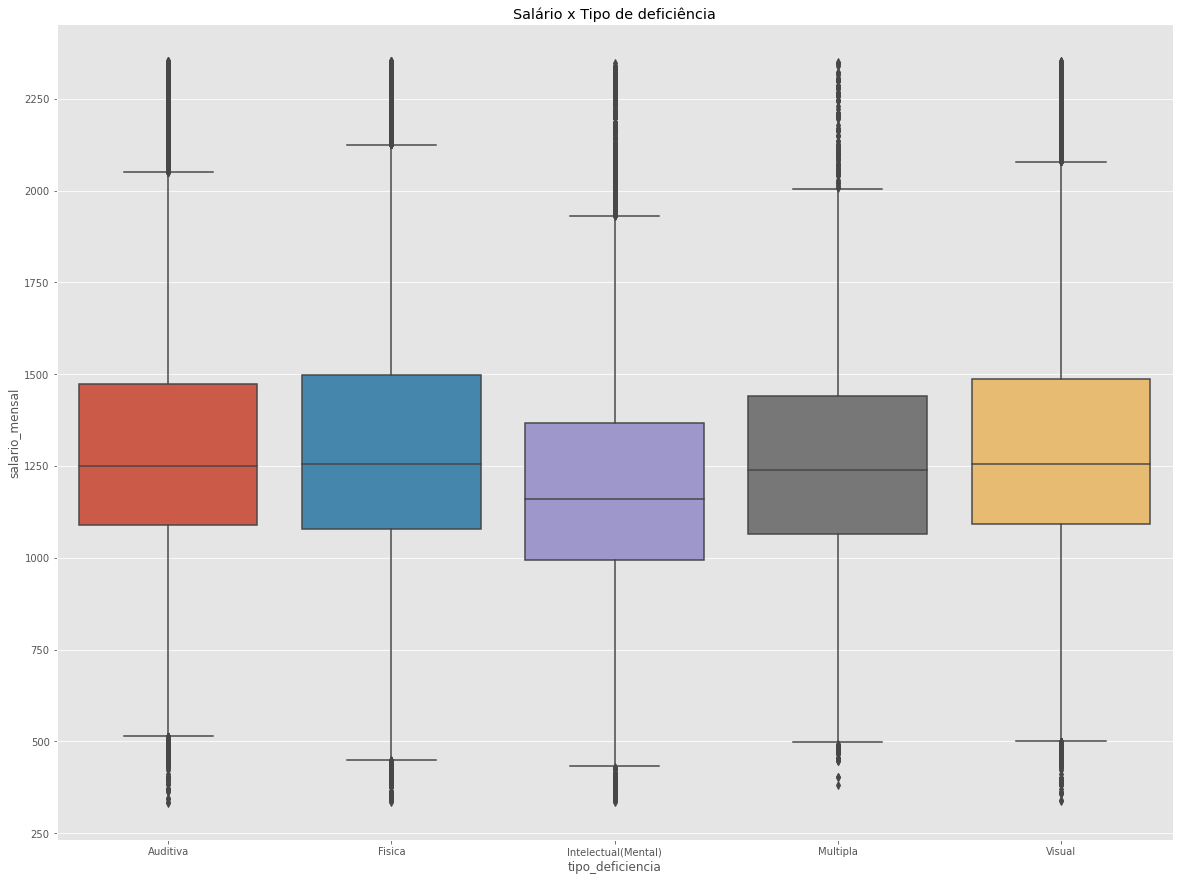

In [58]:
#Boxplot dos salários dos trabalhadores por tipo de deficiência
plt.figure(figsize = (20,15))
sns.boxplot(x = PCDsalario_sem_outlier['tipo_deficiencia'],
            y = PCDsalario_sem_outlier['salario_mensal'],
            order = ['Auditiva','Fisica','Intelectual(Mental)','Multipla','Visual'])
plt.title('Salário x Tipo de deficiência')
plt.savefig('BoxplotPCDDefSal_Salario.png')

In [59]:
#Medidas de dispersão do salário agrupado pela escolaridade
df.groupby(by = 'grau_instrucao')['salario_mensal'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
grau_instrucao,,,,,,,,
Analfabeto,1378.0,1198.97,838.80,325.0,1016.0,1128.5,1317.25,25754.0
Fundamental completo,16308.0,1383.56,1187.55,306.0,1081.0,1232.0,1447.00,101200.0
Fundamental incompleto,24143.0,1295.96,726.01,300.0,1043.0,1184.0,1390.00,29606.0
Medio completo,113152.0,1445.35,1229.01,300.0,1090.0,1283.0,1534.00,130570.0
Medio incompleto,17464.0,1240.13,890.01,312.0,1020.0,1175.0,1390.00,87884.0
Superior completo,22324.0,3029.97,3702.81,309.0,1374.0,2000.0,3207.25,133270.0
Superior incompleto,10332.0,1767.27,1644.38,309.0,1186.0,1472.0,2000.00,100733.0


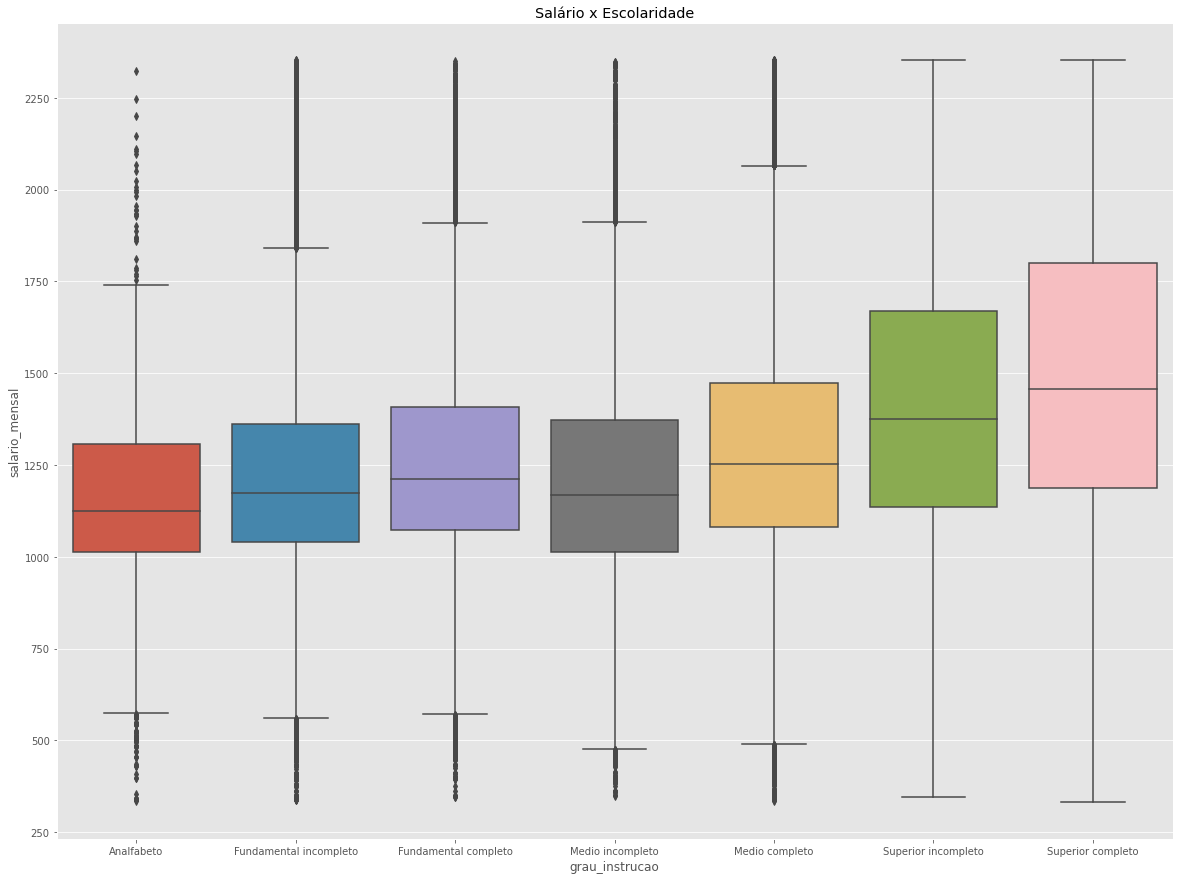

In [60]:
#Boxplot com a relação entre o salário mensal e a escolaridade
plt.figure(figsize = (20,15))
sns.boxplot(x = PCDsalario_sem_outlier['grau_instrucao'] ,
            y = PCDsalario_sem_outlier['salario_mensal'],
            order = ['Analfabeto','Fundamental incompleto','Fundamental completo','Medio incompleto','Medio completo','Superior incompleto','Superior completo'])
plt.title('Salário x Escolaridade')
plt.savefig('BoxplotEScolaridade_Salario.png')